In [22]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy import ndimage
from six.moves import cPickle as pickle
import tensorflow as tf

In [23]:
train_filename = 'train14D6class10000'
test_filename = 'train14D6class100'

In [24]:
# extracting the datasets
num_classes = 6
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall()
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

train14D6class10000 already present - Skipping extraction of train14D6class10000.
['train14D6class10000/0', 'train14D6class10000/100', 'train14D6class10000/150', 'train14D6class10000/200', 'train14D6class10000/250', 'train14D6class10000/50']
train14D6class100 already present - Skipping extraction of train14D6class100.
['train14D6class100/0', 'train14D6class100/100', 'train14D6class100/150', 'train14D6class100/200', 'train14D6class100/250', 'train14D6class100/50']


In [25]:
# have a look at data
import random
import hashlib

def disp_samples(data_folders, sample_size):
  for folder in data_folders:
    print(folder)
    image_files = os.listdir(folder)
    image_sample = random.sample(image_files, sample_size)
    for image in image_sample:
      image_file = os.path.join(folder, image)
      i = Image(filename=image_file)
      display(i)

In [8]:
disp_samples(train_folders, 1)

train14D6class10000/0


train14D6class10000/100


train14D6class10000/150


train14D6class10000/200


train14D6class10000/250


train14D6class10000/50


In [6]:
disp_samples(test_folders, 1)

train14D6class100/0


train14D6class100/100


train14D6class100/150


train14D6class100/200


train14D6class100/250


train14D6class100/50


In [26]:
#Merging the data

image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
num_of_classes = 6

float_formatter = lambda x: "%.2f" % x

        
def Merge_folders(data_folders, size_per_class):
  dataset_names = []
  start_t = 0
  end_t = size_per_class
  required_size = size_per_class * num_of_classes
  trainDataset = np.ndarray((required_size, image_size, image_size), dtype=np.float32)
  labelsDataset = np.ndarray((required_size, 1), dtype=np.float32)
  for folder in data_folders:
    dataset_names.append(folder)

    print('Merging %s.' % folder)
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
    image_index = 0
    for image in os.listdir(folder):
        if image_index < size_per_class:
            image_file = os.path.join(folder, image)
            image_data = (ndimage.imread(image_file).astype(int))
            dataset[image_index, :, :] = image_data
            image_index += 1
    num_images = image_index
    dataset = dataset[0:num_images, :, :]
    trainDataset[start_t:end_t, :, :] = dataset
    x = float(folder.split("/")[1]) / 255.0
    #y = float_formatter(x)
    labelsDataset[start_t:end_t] = x
    start_t += size_per_class
    end_t += size_per_class

  
  return dataset_names, trainDataset, labelsDataset

train_datasets, trainDataset, labelsTrainDataset = Merge_folders(train_folders, 10000)
test_datasets, testDataset, labelsTestDataset = Merge_folders(test_folders, 100)

print(trainDataset)
print(labelsTrainDataset)

print(testDataset)
print(labelsTestDataset)

print('trainDataset.shape' , trainDataset.shape)
print('labelsTrainDataset.shape' , labelsTrainDataset.shape)

print('testDataset.shape' , testDataset.shape)
print('labelsTestDataset.shape' , labelsTestDataset.shape)

Merging train14D6class10000/0.
Merging train14D6class10000/100.
Merging train14D6class10000/150.
Merging train14D6class10000/200.
Merging train14D6class10000/250.
Merging train14D6class10000/50.
Merging train14D6class100/0.
Merging train14D6class100/100.
Merging train14D6class100/150.
Merging train14D6class100/200.
Merging train14D6class100/250.
Merging train14D6class100/50.
[[[  0.   0.   0. ...,   0.   0.   0.]
  [  0.   0.   0. ...,   0.   0.   0.]
  [  0.   0.   0. ...,   0.   0.   0.]
  ..., 
  [  0.   0.   0. ...,   0.   0.   0.]
  [  0.   0.   0. ...,   0.   0.   0.]
  [  0.   0.   0. ...,   0.   0.   0.]]

 [[  0.   0.   0. ...,   0.   0.   0.]
  [  0.   0.   0. ...,   0.   0.   0.]
  [  0.   0.   0. ...,   0.   0.   0.]
  ..., 
  [  0.   0.   0. ...,   0.   0.   0.]
  [  0.   0.   0. ...,   0.   0.   0.]
  [  0.   0.   0. ...,   0.   0.   0.]]

 [[  0.   0.   0. ...,   0.   0.   0.]
  [  0.   0.   0. ...,   0.   0.   0.]
  [  0.   0.   0. ...,   0.   0.   0.]
  ..., 
  [  0.  

23352
[ 0.58823532]


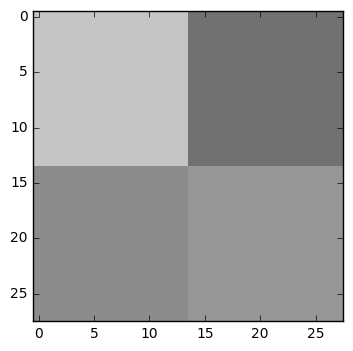

0.58823529411764708

In [27]:
#test the data
rand_image = random.randint(0, 60000)
print (rand_image)
plt.imshow(trainDataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (labelsTrainDataset[rand_image])
plt.show()
np.mean(trainDataset[rand_image])/ 255.0

In [28]:
# randomize the data
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(trainDataset, labelsTrainDataset)
test_dataset, test_labels = randomize(testDataset, labelsTestDataset)

53462
[ 0.78431374]


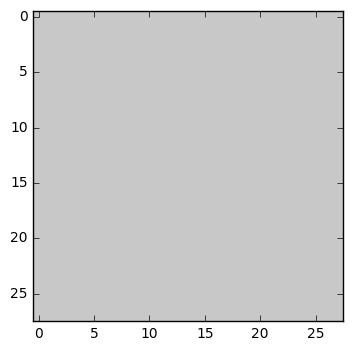

0.78431372549019607

In [30]:
#test the data
rand_image = random.randint(0, 60000)
print (rand_image)
plt.imshow(train_dataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (train_labels[rand_image])
plt.show()
np.mean(train_dataset[rand_image]) / 255.0

69
[ 0.19607843]


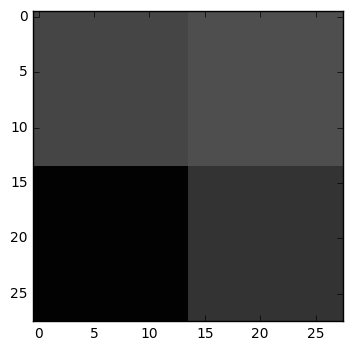

0.19607843137254902

In [31]:
#test the data
rand_image = random.randint(0, 600)
print (rand_image)
plt.imshow(test_dataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (test_labels[rand_image])
plt.show()
np.mean(test_dataset[rand_image]) / 255.0

In [32]:
# save the data
pickle_file = 'br6class14DReg.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [33]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 190284307


In [34]:
#estimate the duplicates

all_data = pickle.load(open('br6class14DReg.pickle', 'rb'))

def count_duplicates(dataset1, dataset2):
    hashes = [hashlib.sha1(x).hexdigest() for x in dataset1]
    dup_indices = []
    for i in range(0, len(dataset2)):
        if hashlib.sha1(dataset2[i]).hexdigest() in hashes:
            dup_indices.append(i)
    return len(dup_indices)


print(count_duplicates(all_data['test_dataset'], all_data['train_dataset']))

26739


In [35]:
# test a regression model

train_dataset = all_data['train_dataset']
train_labels = all_data['train_labels']
test_dataset = all_data['test_dataset']
test_labels = all_data['test_labels']

print (len(train_dataset))
print (len(train_labels))
print (len(test_dataset))
print (len(test_labels))

60000
60000
600
600


In [16]:

def get_score(train_dataset, train_labels, test_dataset, test_labels):
    model = LinearRegression()
    train_flatten_dataset = np.array([x.flatten() for x in train_dataset])
    test_flatten_dataset = np.array([x.flatten() for x in test_dataset])
    model.fit(train_flatten_dataset, train_labels)

    return model.score([x.flatten() for x in test_dataset], test_labels)

print("100 trainsamples score: " + str(get_score(train_dataset[:100], train_labels[:100], test_dataset, test_labels)))
print("1000 trainsamples score: " + str(get_score(train_dataset[:1000], train_labels[:1000], test_dataset, test_labels)))
print("5000 trainsamples score: " + str(get_score(train_dataset[:5000], train_labels[:5000], test_dataset, test_labels)))
print("10000 trainsamples score: " + str(get_score(train_dataset[:10000], train_labels[:10000], test_dataset, test_labels)))
print("60000 trainsamples score: " + str(get_score(train_dataset[:60000], train_labels[:60000], test_dataset, test_labels)))

100 trainsamples score: 1.0
1000 trainsamples score: 1.0
5000 trainsamples score: 1.0
10000 trainsamples score: 1.0
60000 trainsamples score: 1.0


In [36]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_flatten_dataset = np.array([x.flatten() for x in train_dataset])
test_flatten_dataset = np.array([x.flatten() for x in test_dataset])
regr.fit(train_flatten_dataset, train_labels)
print("Mean squared error: %.2f"
      % np.mean((regr.predict(test_flatten_dataset) - test_labels) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_flatten_dataset, test_labels))


Mean squared error: 0.00
Variance score: 1.00


In [37]:
test_flatten_dataset

array([[  56.,   56.,   56., ...,   99.,   99.,   99.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [ 188.,  188.,  188., ...,   76.,   76.,   76.],
       ..., 
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [  21.,   21.,   21., ...,   80.,   80.,   80.],
       [ 200.,  200.,  200., ...,  236.,  236.,  236.]], dtype=float32)

In [38]:
test_labels

array([[ 0.39215687],
       [ 0.        ],
       [ 0.58823532],
       [ 0.        ],
       [ 0.39215687],
       [ 0.78431374],
       [ 0.19607843],
       [ 0.19607843],
       [ 0.98039216],
       [ 0.        ],
       [ 0.98039216],
       [ 0.19607843],
       [ 0.98039216],
       [ 0.        ],
       [ 0.58823532],
       [ 0.98039216],
       [ 0.19607843],
       [ 0.98039216],
       [ 0.39215687],
       [ 0.19607843],
       [ 0.        ],
       [ 0.78431374],
       [ 0.        ],
       [ 0.78431374],
       [ 0.58823532],
       [ 0.        ],
       [ 0.98039216],
       [ 0.98039216],
       [ 0.39215687],
       [ 0.19607843],
       [ 0.39215687],
       [ 0.39215687],
       [ 0.39215687],
       [ 0.39215687],
       [ 0.        ],
       [ 0.98039216],
       [ 0.39215687],
       [ 0.39215687],
       [ 0.58823532],
       [ 0.19607843],
       [ 0.        ],
       [ 0.        ],
       [ 0.19607843],
       [ 0.58823532],
       [ 0.58823532],
       [ 0

In [39]:
xs = regr.predict(test_flatten_dataset)
regr.predict(test_flatten_dataset)

array([[ 0.3926704 ],
       [ 0.00117126],
       [ 0.58788774],
       [ 0.00117126],
       [ 0.39257011],
       [ 0.78361076],
       [ 0.19668533],
       [ 0.19678113],
       [ 0.97922063],
       [ 0.00117126],
       [ 0.97922063],
       [ 0.19678018],
       [ 0.97922063],
       [ 0.00117126],
       [ 0.58807208],
       [ 0.97922063],
       [ 0.19681343],
       [ 0.97922063],
       [ 0.39220353],
       [ 0.19693181],
       [ 0.00117126],
       [ 0.78361076],
       [ 0.00117126],
       [ 0.78351019],
       [ 0.58766279],
       [ 0.00117126],
       [ 0.97922063],
       [ 0.97922063],
       [ 0.39221769],
       [ 0.19678113],
       [ 0.3922771 ],
       [ 0.39230587],
       [ 0.39224328],
       [ 0.3923458 ],
       [ 0.00117126],
       [ 0.97922063],
       [ 0.3923881 ],
       [ 0.39253693],
       [ 0.58797074],
       [ 0.19667356],
       [ 0.00117126],
       [ 0.00117126],
       [ 0.19679815],
       [ 0.58818346],
       [ 0.58827242],
       [ 0

In [40]:
test_labels.shape

(600, 1)

In [41]:
regr.predict(test_flatten_dataset).shape

(600, 1)

In [42]:
test_labels[10:20]

array([[ 0.98039216],
       [ 0.19607843],
       [ 0.98039216],
       [ 0.        ],
       [ 0.58823532],
       [ 0.98039216],
       [ 0.19607843],
       [ 0.98039216],
       [ 0.39215687],
       [ 0.19607843]], dtype=float32)

In [43]:
xs[10:20]

array([[ 0.97922063],
       [ 0.19678018],
       [ 0.97922063],
       [ 0.00117126],
       [ 0.58807208],
       [ 0.97922063],
       [ 0.19681343],
       [ 0.97922063],
       [ 0.39220353],
       [ 0.19693181]])

In [44]:
pickle_file = 'br6class14DReg.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (60000, 28, 28) (60000, 1)
Test set (600, 28, 28) (600, 1)


In [45]:
image_size = 28
num_labels = 6

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (60000, 784) (60000, 1)
Test set (600, 784) (600, 1)


In [46]:
# With gradient descent training, even this much data is prohibitive.
# Subset the training data for faster turnaround.
train_subset = 100

graph = tf.Graph()
with graph.as_default():

  # Input data.
  # Load the training, validation and test data into constants that are
  # attached to the graph.
  tf_train_dataset = tf.constant(train_dataset[:train_subset, :])
  tf_train_labels = tf.constant(train_labels[:train_subset])
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  # These are the parameters that we are going to be training. The weight
  # matrix will be initialized using random valued following a (truncated)
  # normal distribution. The biases get initialized to zero.
  weights = tf.Variable(
    tf.truncated_normal([image_size * image_size, 1]))
  biases = tf.Variable(tf.zeros([1]))
  
  # Training computation.
  # We multiply the inputs with the weight matrix, and add biases. We compute
  # the softmax and cross-entropy (it's one operation in TensorFlow, because
  # it's very common, and it can be optimized). We take the average of this
  # cross-entropy across all training examples: that's our loss.
  logits = tf.matmul(tf_train_dataset, weights) + biases
  loss = tf.reduce_mean(tf.square(logits - tf_train_labels))
  
  # Optimizer.
  # We are going to find the minimum of this loss using gradient descent.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  # These are not part of training, but merely here so that we can report
  # accuracy figures as we train.
  train_prediction = logits
  test_prediction = tf.matmul(tf_test_dataset, weights) + biases

In [48]:
def meanSqrError(predictions, values):
  return np.mean(((predictions - values) ** 2))

num_steps = 1001

with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    #feed_dict = {tf_train_dataset : tf_train_dataset, tf_train_labels : tf_train_labels}
    #_, l, predictions = session.run(
    #  [optimizer, loss, train_prediction], feed_dict=feed_dict)
    _, l, predictions = session.run([optimizer, loss, train_prediction])
    #tuning_cost = session.run(loss, feed_dict)
    #print ("Tuning cost=", "{:.9f}".format(tuning_cost))
    if (step % 50 == 0):
        print('Loss at step %d: %f' % (step, l))
      #print('Minibatch loss at step %d: %f' % (step, tuning_cost))
  #print('Test accuracy: %.1f%%' % meanSqrError(test_prediction.eval(), test_prediction))
  #testing_cost = session.run(loss, feed_dict={tf_test_dataset: tf_test_dataset, test_labels:test_labels})    
  #print ("Testing data cost:" , testing_cost)

Initialized
Loss at step 0: 6314187.500000
Loss at step 50: nan
Loss at step 100: nan
Loss at step 150: nan
Loss at step 200: nan
Loss at step 250: nan
Loss at step 300: nan
Loss at step 350: nan
Loss at step 400: nan
Loss at step 450: nan
Loss at step 500: nan
Loss at step 550: nan
Loss at step 600: nan
Loss at step 650: nan
Loss at step 700: nan
Loss at step 750: nan
Loss at step 800: nan
Loss at step 850: nan
Loss at step 900: nan
Loss at step 950: nan
Loss at step 1000: nan
